In [58]:
import numpy
import scipy.special
import codecs
import matplotlib
import matplotlib.pyplot

class neuralNetWork :
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # self.wih = numpy.random.rand(self.hnodes, self.inodes)-0.5
        # self.who = numpy.random.rand(self.onodes, self.hnodes)-0.5
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        #print self.wih
        
        #触发sigmod函数
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self, inputs_list, target_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(target_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
       
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [72]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learn_rate = 0.2

n = neuralNetWork(input_nodes, hidden_nodes, output_nodes, learn_rate)


In [73]:
train_data_file = open("F:/code/neuralnetwork/mnist_csv/mnist_train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

In [74]:
epochs = 3
for e in range(epochs):
    for record in train_data_list:
        all_values = record.strip().split(',')
        #print all_values
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #print inputs
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        #print targets
        n.train(inputs, targets)
    
    pass


In [64]:
test_data_file = open("F:/code/neuralnetwork/mnist_csv/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [65]:
#单个例子查看
all_values = test_data_list[0].strip().split(',')
print all_values[0]

7


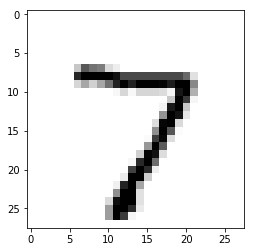

In [66]:
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [67]:
n.query((numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)

array([[3.07672762e-03],
       [2.69659466e-03],
       [4.38447698e-03],
       [1.67485780e-02],
       [4.20525377e-04],
       [2.74803483e-03],
       [2.03038233e-03],
       [9.90659348e-01],
       [4.18954678e-04],
       [6.21600250e-02]])

In [68]:
#结果为7的概率为0.997

In [69]:
scorecard = []

for score in test_data_list:
    all_values = score.strip().split(',')
    correct_label = int(all_values[0])
    print correct_label, "correct_label"
    outputs = n.query((numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)
    label = numpy.argmax(outputs)
    print label, "network answer"
    
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass
print len(scorecard)
pass

7 correct_label
7 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
6 correct_label
6 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
3 correct_

5 correct_label
5 network answer
0 correct_label
0 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
8 correct_label
8 network answer
1 correct_label
1 network answer
8 correct_label
8 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
8 correct_

1 correct_label
1 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
4 correct_label
9 network answer
8 correct_label
8 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
2 correct_label
2 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
6 correct_label
6 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
8 correct_label
8 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
5 correct_

4 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
7 correct_label
7 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
8 correct_label
8 network answer
7 correct_label
7 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
2 correct_label
2 network answer
7 correct_label
7 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
5 correct_label
5 network 

4 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
0 correct_label
0 network answer
3 correct_label
3 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
8 correct_label
8 network answer
6 correct_label
6 network answer
5 correct_label
5 network answer
7 correct_label
7 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
7 correct_label
0 network answer
3 correct_label
3 network 

2 network answer
6 correct_label
6 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
8 correct_label
8 network answer
3 correct_label
9 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
2 correct_label
3 network answer
3 correct_label
3 network answer
0 correct_label
0 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
5 correct_label
5 network 

4 correct_label
4 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
8 correct_label
8 network answer
4 correct_label
4 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
1 correct_label
2 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
2 correct_label
3 network answer
7 correct_label
7 network answer
0 correct_label
0 network answer
9 correct_label
1 network answer
0 correct_label
0 network answer
2 correct_label
2 network answer
5 correct_label
5 network answer
7 correct_label
7 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
6 correct_

8 network answer
7 correct_label
7 network answer
3 correct_label
3 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
0 correct_label
0 network answer
9 correct_label
9 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
8 correct_label
8 network 

1 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
4 correct_label
9 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
0 correct_label
0 network answer
8 correct_label
8 network answer
8 correct_label
0 network answer
8 correct_label
8 network answer
4 correct_label
4 network 

3 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
2 correct_label
2 network answer
8 correct_label
8 network answer
7 correct_label
7 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
4 correct_label
4 network answer
4 correct_label
4 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
6 correct_label
6 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
8 correct_label
8 network answer
8 correct_label
8 network answer
4 correct_label
4 network 

2 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
7 correct_label
7 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
9 correct_label
3 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
6 correct_label
6 network answer
6 correct_label
6 network answer
7 correct_label
0 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
4 correct_label
4 network 

8 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
4 correct_label
6 network answer
0 correct_label
0 network answer
3 correct_label
5 network answer
3 correct_label
3 network answer
2 correct_label
2 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
2 correct_label
2 network answer
8 correct_label
8 network 

6 network answer
0 correct_label
0 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
2 correct_label
7 network answer
8 correct_label
8 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
2 correct_label
2 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
5 correct_label
8 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
8 correct_label
8 network answer
3 correct_label
7 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
5 correct_label
5 network 

9 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
8 correct_label
8 network answer
2 correct_label
2 network answer
7 correct_label
7 network 

2 network answer
7 correct_label
7 network answer
0 correct_label
0 network answer
7 correct_label
7 network answer
7 correct_label
7 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
2 correct_label
2 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
5 correct_label
5 network 

4 correct_label
4 network answer
8 correct_label
8 network answer
1 correct_label
1 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
4 correct_label
4 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
8 correct_label
8 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
7 correct_label
7 network answer
2 correct_label
2 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
7 correct_label
7 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
6 correct_

8 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
3 correct_label
3 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
4 correct_label
4 network answer
7 correct_label
9 network answer
6 correct_label
6 network answer
2 correct_label
2 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
0 correct_label
0 network 

9 network answer
8 correct_label
3 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
3 correct_label
9 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
8 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
5 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
3 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network 

6 network answer
8 correct_label
8 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
3 correct_label
2 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
0 correct_label
6 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network 

4 network answer
7 correct_label
7 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
3 correct_label
3 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
6 correct_label
6 network answer
5 correct_label
5 network answer
8 correct_label
8 network answer
6 correct_label
6 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
1 correct_label
8 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
7 correct_label
7 network 

6 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
8 correct_label
8 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
5 correct_label
5 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
1 correct_label
1 network answer
0 correct_label
0 network answer
3 correct_label
3 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
8 correct_label
8 network answer
7 correct_label
7 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
6 correct_label
6 network 

5 correct_label
5 network answer
5 correct_label
5 network answer
3 correct_label
0 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
8 correct_label
8 network answer
2 correct_label
2 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
0 correct_label
0 network answer
2 correct_label
2 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
0 correct_label
0 network answer
2 correct_label
2 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
3 correct_label
3 network answer
8 correct_label
8 network answer
6 correct_label
6 network answer
7 correct_

4 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
5 correct_label
8 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
5 correct_label
8 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
2 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
9 correct_label
9 network 

3 correct_label
3 network answer
7 correct_label
7 network answer
7 correct_label
7 network answer
4 correct_label
4 network answer
4 correct_label
4 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
9 correct_label
9 network answer
5 correct_label
5 network answer
3 correct_label
3 network answer
8 correct_label
8 network answer
8 correct_label
8 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
4 correct_label
4 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
8 correct_label
8 network answer
5 correct_label
5 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
1 correct_

1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
1 correct_label
1 network answer
0 correct_label
0 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
6 correct_label
6 network answer
6 correct_label
6 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
4 correct_label
4 network answer
2 correct_label
2 network answer
8 correct_label
8 network answer
1 correct_label
1 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
4 correct_label
4 network 

8 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
2 correct_label
2 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
8 correct_label
8 network answer
2 correct_label
2 network answer
6 correct_label
6 network answer
4 correct_label
4 network answer
3 correct_label
3 network answer
4 correct_label
4 network answer
5 correct_label
5 network answer
9 correct_label
9 network 

7 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
5 correct_label
5 network answer
1 correct_label
1 network answer
9 correct_label
9 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
0 correct_label
0 network answer
0 correct_label
0 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
2 correct_label
2 network answer
2 correct_label
2 network answer
3 correct_label
3 network answer
6 correct_label
6 network answer
8 correct_label
8 network answer
3 correct_label
3 network answer
2 correct_label
2 network answer
0 correct_label
0 network answer
0 correct_label
0 network answer
6 correct_label
6 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
5 correct_label
5 network 

0 network answer
0 correct_label
0 network answer
1 correct_label
1 network answer
7 correct_label
7 network answer
5 correct_label
5 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
3 correct_label
3 network answer
1 correct_label
1 network answer
6 correct_label
6 network answer
9 correct_label
9 network answer
7 correct_label
7 network answer
1 correct_label
1 network answer
3 correct_label
3 network answer
0 correct_label
0 network answer
2 correct_label
7 network answer
6 correct_label
6 network answer
0 correct_label
0 network answer
8 correct_label
8 network answer
9 correct_label
9 network answer
4 correct_label
4 network answer
3 correct_label
3 network answer
5 correct_label
5 network answer
4 correct_label
4 network answer
8 correct_label
8 network answer
1 correct_label
1 network answer
5 correct_label
5 network answer
9 correct_label
9 network answer
0 correct_label
0 network 

In [70]:
print scorecard

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [71]:
scorecard_array = numpy.asarray(scorecard)

print "performance=",scorecard_array.sum()*1.0/scorecard_array.size

performance= 0.9601
